In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pathlib
import PIL

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Convolution1D,Conv2D,Rescaling,MaxPooling2D,MaxPool2D,Flatten,Dense,Dropout,RandomFlip,RandomRotation,RandomZoom

In [4]:
data_dir=pathlib.Path('C:\\Users\\viral\\OneDrive\\Desktop\\Master Python\\DL Project\\Tomato Leaf\\tomato\\train\\')

In [5]:
data_dir_val=pathlib.Path('C:\\Users\\viral\\OneDrive\\Desktop\\Master Python\\DL Project\\Tomato Leaf\\tomato\\val\\')

In [6]:
img_count=len(list(data_dir.glob('*/*')))

In [7]:
img_count

10000

In [8]:
batch_size=32
img_height=180
img_width=180

In [9]:
train_ds=keras.utils.image_dataset_from_directory(data_dir,image_size=(img_height,img_width),seed=123,batch_size=batch_size)

Found 10000 files belonging to 10 classes.


In [10]:
val_ds=keras.utils.image_dataset_from_directory(data_dir_val,image_size=(img_height,img_width),seed=123,batch_size=batch_size)

Found 1000 files belonging to 10 classes.


In [11]:
class_name=train_ds.class_names

In [12]:
class_name

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

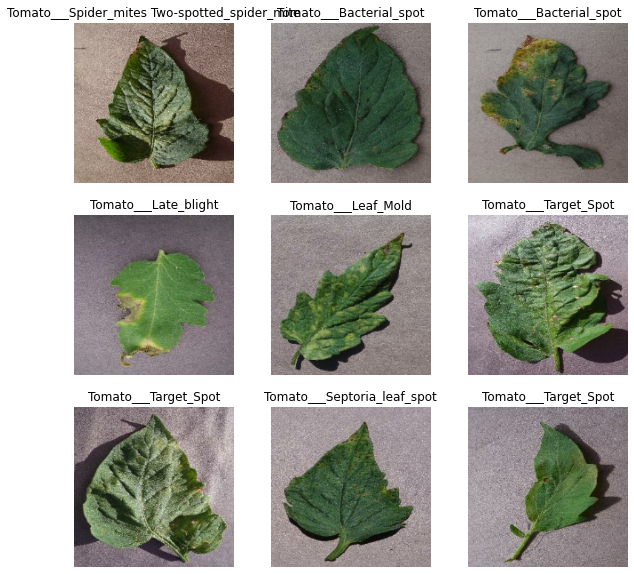

In [13]:
plt.figure(figsize=(10,10))
for image,label in train_ds.take(1):
    for i  in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(class_name[label[i]])
        plt.axis('off')

In [15]:
model=Sequential([
    Rescaling(1./255,input_shape=(img_height,img_width,3)),
    RandomFlip('horizontal',input_shape=(img_height,img_width)),
    RandomZoom(0.1),
    RandomRotation(0.1),
    Conv2D(64,3,padding='same',activation='relu'),
    MaxPool2D(),
    Conv2D(32,3,padding='same',activation='relu'),
    MaxPool2D(),
    Conv2D(16,3,padding='same',activation='relu'),
    MaxPool2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(len(class_name))  
])

In [17]:
model.compile(optimizer='adam',loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [18]:
epochs=20
history=model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/20
313/313 [==============================] - 1649s 5s/step - loss: 1.4638 - accuracy: 0.4726 - val_loss: 0.9737 - val_accuracy: 0.6580
Epoch 2/20
313/313 [==============================] - 1453s 5s/step - loss: 0.7949 - accuracy: 0.7223 - val_loss: 0.5344 - val_accuracy: 0.8100
Epoch 3/20
313/313 [==============================] - 1410s 5s/step - loss: 0.5748 - accuracy: 0.7983 - val_loss: 0.4941 - val_accuracy: 0.8190
Epoch 4/20
313/313 [==============================] - 4191s 13s/step - loss: 0.5009 - accuracy: 0.8251 - val_loss: 0.6336 - val_accuracy: 0.8040
Epoch 5/20
313/313 [==============================] - 559s 2s/step - loss: 0.4310 - accuracy: 0.8456 - val_loss: 0.3980 - val_accuracy: 0.8680
Epoch 6/20
313/313 [==============================] - 561s 2s/step - loss: 0.3516 - accuracy: 0.8744 - val_loss: 0.4506 - val_accuracy: 0.8600
Epoch 7/20
313/313 [==============================] - 559s 2s/step - loss: 0.3242 - accuracy: 0.8879 - val_loss: 0.4607 - val_accuracy: 0